<a href="https://colab.research.google.com/github/Inventrohyder/NS166_final/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Authenticate the Google user
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [2]:
# Access the Google Sheet
worksheet = gc.open_by_key('1Ik1wZgqpTwPdoTVP0m_1WU4Gm2IFU43L9q7bnhXwnsc')
worksheet = worksheet.worksheet('NYST_Future')
data = worksheet.get_all_values()

In [3]:
# Transform the Google Sheet data to a Pandas DataFrame
import pandas as pd
import numpy as np
df = pd.DataFrame(data[1:], columns=data[0])

# Clean the data
df = df.replace('',np.nan)
df = df.replace('N/A', np.nan)
for column in df.columns:
  df[column] = df[column].astype('float64', errors='ignore')
df.head()

,ID,QUADNAME,Easting,Northing,Current_July_Temp,Current_Precipit,Future_temp,Future_precipit,Current_with_mink
0,1.0,ROUSES POINT,633135.654,4977693.14,20.85,844.0,23.35,970.60,0.0
1,2.0,CHAMPLAIN,623273.036,4977637.88,20.60,832.0,23.10,956.80,0.0
2,3.0,MOOERS,613536.834,4976568.65,20.60,834.0,23.10,959.10,1.0
3,4.0,RAQUETTE RIVER,514878.984,4975810.76,20.90,891.0,23.40,1024.65,0.0
4,5.0,ALTONA,603557.797,4976608.70,20.25,854.0,22.75,982.10,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5c5112f28>,
      dtype=object)

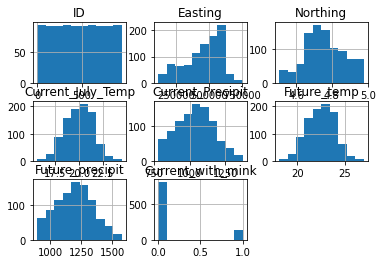

In [4]:
df.hist()

In [5]:
df.groupby(by="Current_with_mink").count()

,ID,QUADNAME,Easting,Northing,Current_July_Temp,Current_Precipit,Future_temp,Future_precipit
Current_with_mink,,,,,,,,
0.0,808,808,808,808,808,808,808,808
1.0,136,136,136,136,136,136,136,136


In [6]:
df_minked = df[df['Current_with_mink'] == 1]
df_minked.head()

,ID,QUADNAME,Easting,Northing,Current_July_Temp,Current_Precipit,Future_temp,Future_precipit,Current_with_mink
2,3.0,MOOERS,613536.834,4976568.65,20.600000,834.0,23.100000,959.10,1.0
5,6.0,ELLENBURG DEPOT,593694.309,4976601.29,19.799999,884.0,22.299999,1016.60,1.0
7,8.0,CHURUBUSCO,583837.561,4976592.07,19.200001,943.0,21.700001,1084.45,1.0
8,9.0,CHATEAUGAY,573974.945,4976436.88,19.700001,938.0,22.200001,1078.70,1.0
18,19.0,WEST CHAZY,613671.266,4963128.87,20.100000,839.0,22.600000,964.85,1.0


In [7]:
df_not_minked = df[df['Current_with_mink'] == 0]
df_not_minked.head()

,ID,QUADNAME,Easting,Northing,Current_July_Temp,Current_Precipit,Future_temp,Future_precipit,Current_with_mink
0,1.0,ROUSES POINT,633135.654,4977693.14,20.85,844.0,23.35,970.60,0.0
1,2.0,CHAMPLAIN,623273.036,4977637.88,20.60,832.0,23.10,956.80,0.0
3,4.0,RAQUETTE RIVER,514878.984,4975810.76,20.90,891.0,23.40,1024.65,0.0
4,5.0,ALTONA,603557.797,4976608.70,20.25,854.0,22.75,982.10,0.0
6,7.0,HOGANSBURG,524661.876,4975525.61,20.90,891.0,23.40,1024.65,0.0


In [8]:
# Use undersampling to balance the presence of mink frogs
df_not_minked = df_not_minked.sample(n=544, random_state=1, replace = False)

new_df = pd.concat([df_minked, df_not_minked])
new_df = new_df.sample(frac=1, random_state=42)
new_df.head()

,ID,QUADNAME,Easting,Northing,Current_July_Temp,Current_Precipit,Future_temp,Future_precipit,Current_with_mink
844,845.0,LIBERTY EAST,525961.390,4629007.78,19.549999,1217.0,22.049999,1399.55,0.0
743,744.0,ERIN,360649.260,4671974.70,19.900000,894.0,22.400000,1028.10,0.0
159,160.0,LITTLE TUPPER LAKE,535044.585,4878909.59,17.700001,1103.0,20.200001,1268.45,1.0
267,268.0,FORT ANN,626455.505,4810587.89,21.500000,975.0,24.000000,1121.25,0.0
254,255.0,HIGH MARKET,454566.770,4823438.17,18.400000,1341.0,20.900000,1542.15,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5c4d65f60>,
      dtype=object)

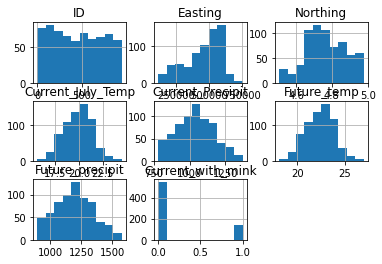

In [9]:
new_df.hist()

In [10]:
all_X = df[['Current_July_Temp', 'Current_Precipit']].to_numpy()
all_y = df['Current_with_mink'].apply(int).to_numpy()

to_model_X = new_df[['Current_July_Temp', 'Current_Precipit']].to_numpy()
to_model_y = new_df['Current_with_mink'].apply(int).to_numpy()

future_X = df[['Future_temp', 'Future_precipit']].to_numpy()

Automatically created module for IPython interactive environment
name: Nearest Neighbors ; score 0.8235294117647058
name: Linear SVM ; score 0.7794117647058824
name: RBF SVM ; score 0.8897058823529411
name: Gaussian Process ; score 0.875
name: Decision Tree ; score 0.8676470588235294
name: Random Forest ; score 0.8897058823529411
name: Neural Net ; score 0.8897058823529411
name: AdaBoost ; score 0.8823529411764706
name: Naive Bayes ; score 0.8897058823529411
name: QDA ; score 0.8602941176470589


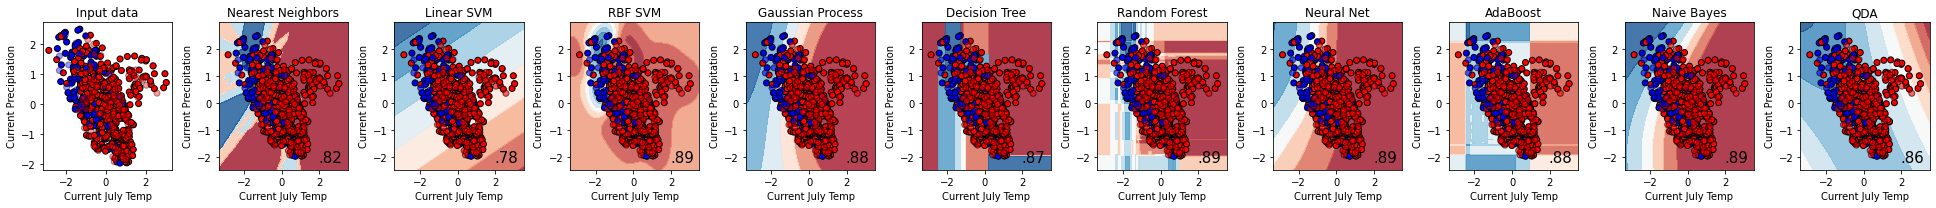

In [11]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# Modified to fit the frogs by Haitham Alhad
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]



figure = plt.figure(figsize=(27, 3))
i = 1

# preprocess dataset, split into training and test part
X, y = (to_model_X, to_model_y)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")
ax.set_xlabel("Current July Temp")
ax.set_ylabel("Current Precipitation")

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
            edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4,
            edgecolors='k')

i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('name:', name, '; score', score)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                edgecolors='k', alpha=0.6)

    ax.set_title(name)
    ax.set_xlabel("Current July Temp")
    ax.set_ylabel("Current Precipitation")
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

In [12]:
print(f'Actual number of places supporting mink frogs now {sum(all_y)}')

for name, clf in zip(names, classifiers):
  print(name, sum(clf.predict(X)))

Actual number of places supporting mink frogs now 136
Nearest Neighbors 105
Linear SVM 0
RBF SVM 60
Gaussian Process 60
Decision Tree 102
Random Forest 72
Neural Net 63
AdaBoost 75
Naive Bayes 90
QDA 64


In [13]:
# Using the classifiers to find the number of places
# predicted to have mink frogs

print(f'Actual number of places supporting mink frogs now {sum(all_y)}')

to_predict = scaler.transform(all_X)


for name, clf in zip(names, classifiers):
  print(name, sum(clf.predict(to_predict)))

Actual number of places supporting mink frogs now 136
Nearest Neighbors 127
Linear SVM 0
RBF SVM 67
Gaussian Process 69
Decision Tree 113
Random Forest 84
Neural Net 72
AdaBoost 84
Naive Bayes 104
QDA 75


In [14]:
to_predict = scaler.transform(future_X)

for name, clf in zip(names, classifiers):
  print(name, sum(clf.predict(to_predict)))

Nearest Neighbors 16
Linear SVM 0
RBF SVM 0
Gaussian Process 12
Decision Tree 11
Random Forest 17
Neural Net 1
AdaBoost 78
Naive Bayes 62
QDA 1


## Incorporate the positions (long, lat)

In [15]:
columns = ['Easting',	'Northing', 'Current_July_Temp', 'Current_Precipit']
all_X = df[columns].to_numpy()
all_y = df['Current_with_mink'].apply(int).to_numpy()

to_model_X = new_df[columns].to_numpy()
to_model_y = new_df['Current_with_mink'].apply(int).to_numpy()

future_X = df[['Easting','Northing','Future_temp', 'Future_precipit']].to_numpy()

name: Nearest Neighbors ; score 0.9044117647058824
name: Linear SVM ; score 0.9117647058823529
name: RBF SVM ; score 0.9044117647058824
name: Gaussian Process ; score 0.9191176470588235
name: Decision Tree ; score 0.9191176470588235
name: Random Forest ; score 0.9117647058823529
name: Neural Net ; score 0.9191176470588235
name: AdaBoost ; score 0.9044117647058824
name: Naive Bayes ; score 0.9117647058823529
name: QDA ; score 0.8970588235294118


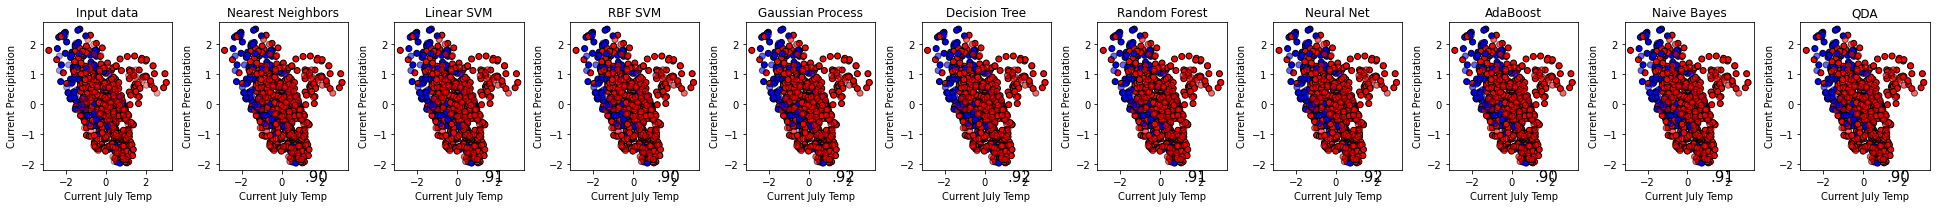

In [16]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]



figure = plt.figure(figsize=(27, 3))
i = 1

# preprocess dataset, split into training and test part
X, y = (to_model_X, to_model_y)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")
ax.set_xlabel("Current July Temp")
ax.set_ylabel("Current Precipitation")

# Plot the training points
ax.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap=cm_bright,
            edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 2], X_test[:, 3], c=y_test, cmap=cm_bright, alpha=0.4,
            edgecolors='k')

i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('name:', name, '; score', score)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    # if hasattr(clf, "decision_function"):
    #     Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    # else:
    #     Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # # Put the result into a color plot
    # Z = Z.reshape(xx.shape)
    # ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap=cm_bright,
                edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 2], X_test[:, 3], c=y_test, cmap=cm_bright,
                edgecolors='k', alpha=0.6)

    ax.set_title(name)
    ax.set_xlabel("Current July Temp")
    ax.set_ylabel("Current Precipitation")
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

In [17]:
print(f'Actual number of places supporting mink frogs now {sum(all_y)}')

for name, clf in zip(names, classifiers):
  print(name, sum(clf.predict(X)))

Actual number of places supporting mink frogs now 136
Nearest Neighbors 147
Linear SVM 119
RBF SVM 128
Gaussian Process 141
Decision Tree 138
Random Forest 125
Neural Net 138
AdaBoost 138
Naive Bayes 156
QDA 198


In [18]:
# Using the classifiers to find the number of places
# predicted to have mink frogs

print(f'Actual number of places supporting mink frogs now {sum(all_y)}')

to_predict = scaler.transform(all_X)

for name, clf in zip(names, classifiers):
  print(name, sum(clf.predict(to_predict)))

Actual number of places supporting mink frogs now 136
Nearest Neighbors 180
Linear SVM 139
RBF SVM 156
Gaussian Process 172
Decision Tree 165
Random Forest 140
Neural Net 169
AdaBoost 165
Naive Bayes 188
QDA 244


In [19]:
to_predict = scaler.transform(future_X)

for name, clf in zip(names, classifiers):
  print(name, sum(clf.predict(to_predict)))

Nearest Neighbors 62
Linear SVM 86
RBF SVM 0
Gaussian Process 188
Decision Tree 263
Random Forest 22
Neural Net 151
AdaBoost 179
Naive Bayes 136
QDA 0


## Tensorflow

In [20]:
import tensorflow as tf

In [21]:
all_X = df[['Current_July_Temp', 'Current_Precipit']].to_numpy()
all_y = df['Current_with_mink'].apply(int).to_numpy()

future_X = df[['Future_temp', 'Future_precipit']].to_numpy()

to_model_X = new_df[['Current_July_Temp', 'Current_Precipit']].to_numpy()
to_model_y = new_df['Current_with_mink'].apply(int).to_numpy()
scaler = StandardScaler()
scaler.fit(to_model_X)
X = scaler.transform(to_model_X)

In [22]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, to_model_y, test_size=.2, random_state=42)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2, 1)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3072      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1

In [25]:
num_epochs = 30
history = model.fit(
    X_train, y_train,
    epochs= num_epochs,
    validation_data = (X_test, y_test),
    verbose=2
)

Epoch 1/30
17/17 - 0s - loss: 0.5411 - accuracy: 0.8051 - val_loss: 0.3894 - val_accuracy: 0.7794
Epoch 2/30
17/17 - 0s - loss: 0.4464 - accuracy: 0.8088 - val_loss: 0.3514 - val_accuracy: 0.8529
Epoch 3/30
17/17 - 0s - loss: 0.4151 - accuracy: 0.8217 - val_loss: 0.3675 - val_accuracy: 0.7794
Epoch 4/30
17/17 - 0s - loss: 0.4143 - accuracy: 0.8162 - val_loss: 0.3442 - val_accuracy: 0.8824
Epoch 5/30
17/17 - 0s - loss: 0.3985 - accuracy: 0.8309 - val_loss: 0.3192 - val_accuracy: 0.8750
Epoch 6/30
17/17 - 0s - loss: 0.3971 - accuracy: 0.8346 - val_loss: 0.3278 - val_accuracy: 0.8971
Epoch 7/30
17/17 - 0s - loss: 0.3940 - accuracy: 0.8290 - val_loss: 0.3131 - val_accuracy: 0.8971
Epoch 8/30
17/17 - 0s - loss: 0.3911 - accuracy: 0.8309 - val_loss: 0.3127 - val_accuracy: 0.8971
Epoch 9/30
17/17 - 0s - loss: 0.3867 - accuracy: 0.8419 - val_loss: 0.2982 - val_accuracy: 0.8971
Epoch 10/30
17/17 - 0s - loss: 0.3836 - accuracy: 0.8290 - val_loss: 0.2988 - val_accuracy: 0.8897
Epoch 11/30
17/17 -

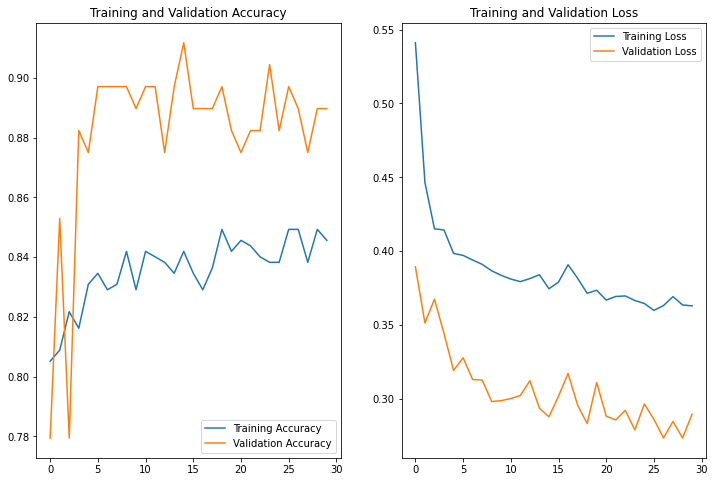

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
print(f'Actual number of places supporting mink frogs now {sum(all_y)}')

to_predict = scaler.transform(all_X)

predictions = model.predict(to_predict)

sum([1 if x > 0.5 else 0 for x in predictions])

Actual number of places supporting mink frogs now 136


112

In [28]:
to_predict = scaler.transform(future_X)

predictions = model.predict(to_predict)

sum([1 if x > 0.5 else 0 for x in predictions])

2

### Incorporate positions (long, lat)

In [29]:
columns = ['Easting',	'Northing', 'Current_July_Temp', 'Current_Precipit']
all_X = df[columns].to_numpy()
all_y = df['Current_with_mink'].apply(int).to_numpy()

to_model_X = new_df[columns].to_numpy()
to_model_y = new_df['Current_with_mink'].apply(int).to_numpy()

future_X = df[['Easting','Northing','Future_temp', 'Future_precipit']].to_numpy()

scaler = StandardScaler()
scaler.fit(to_model_X)
X = scaler.transform(to_model_X)

In [30]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, to_model_y, test_size=.2, random_state=42)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(4, 1)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              5120      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [33]:
num_epochs = 30
history = model.fit(
    X_train, y_train,
    epochs= num_epochs,
    validation_data = (X_test, y_test),
    verbose=2
)

Epoch 1/30
17/17 - 0s - loss: 0.4863 - accuracy: 0.8143 - val_loss: 0.2479 - val_accuracy: 0.8750
Epoch 2/30
17/17 - 0s - loss: 0.2818 - accuracy: 0.8566 - val_loss: 0.2126 - val_accuracy: 0.9191
Epoch 3/30
17/17 - 0s - loss: 0.2606 - accuracy: 0.8585 - val_loss: 0.2106 - val_accuracy: 0.9118
Epoch 4/30
17/17 - 0s - loss: 0.2578 - accuracy: 0.8603 - val_loss: 0.2109 - val_accuracy: 0.9118
Epoch 5/30
17/17 - 0s - loss: 0.2537 - accuracy: 0.8621 - val_loss: 0.2099 - val_accuracy: 0.9191
Epoch 6/30
17/17 - 0s - loss: 0.2525 - accuracy: 0.8676 - val_loss: 0.2241 - val_accuracy: 0.9044
Epoch 7/30
17/17 - 0s - loss: 0.2456 - accuracy: 0.8695 - val_loss: 0.2017 - val_accuracy: 0.9044
Epoch 8/30
17/17 - 0s - loss: 0.2428 - accuracy: 0.8676 - val_loss: 0.2118 - val_accuracy: 0.9191
Epoch 9/30
17/17 - 0s - loss: 0.2408 - accuracy: 0.8732 - val_loss: 0.2067 - val_accuracy: 0.9118
Epoch 10/30
17/17 - 0s - loss: 0.2430 - accuracy: 0.8695 - val_loss: 0.2060 - val_accuracy: 0.9118
Epoch 11/30
17/17 -

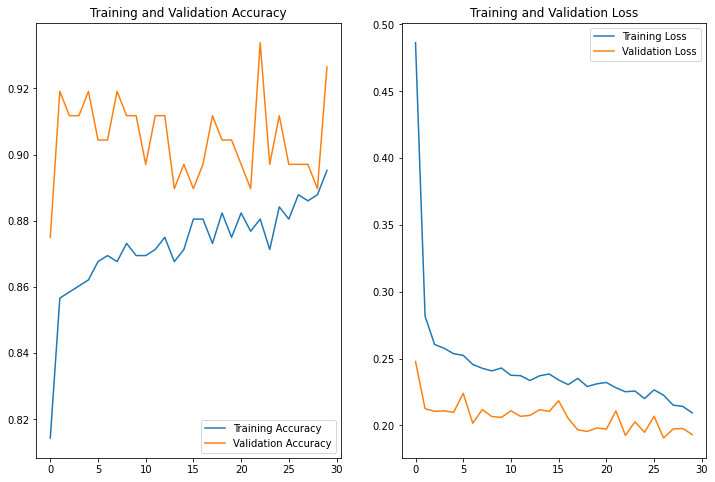

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
print(f'Actual number of places supporting mink frogs now {sum(all_y)}')

to_predict = scaler.transform(all_X)

predictions = model.predict(to_predict)

sum([1 if x > 0.5 else 0 for x in predictions])

Actual number of places supporting mink frogs now 136


168

In [36]:
to_predict = scaler.transform(future_X)

predictions = model.predict(to_predict)

sum([1 if x > 0.5 else 0 for x in predictions])

45